# Competition Policy & Regulation - Assignment 1 - Fill in the following table 

For each student in your group give the name, SNR and email address. Recall that you can do the assignment on your own or in a group of at most three students.

Fill in the [Markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) below (with your real names etc.):

|name|ANR|email|
|----|---|-----|
|1. adam smith|1776|smith@nations.com|
|2. karl marx| 1886|marx@commu.ru|

Once you are finished with the notebook, email it to Gabriel Halm ([g.j.g.halm@tilburguniversity.edu](mailto:g.j.g.halm@tilburguniversity.edu)).

# Set-up
We consider an environment with two firms which compete in quantities (Cournot competition). Each firm $i$ produces a different good. Demand emanates from a representative consumer whose utility is given by: <br>
$u = q_1 + q_2 - (q_1^2 +q_2^2 + 2\gamma q_1q_2)/2 + m$, where $q_i$ is the quantity of product $i$, $\gamma \in [0,1)$ and $m$ stands for the income available for consuming other goods than the ones produced by firms $1$ and $2$.<br>
Both firms face a constant unit cost of production, $c=0.1$.
The goal of this exercise is to study the possibility for firms to collude in this environment.

In [1]:
# Import necessary libraries
from scipy import optimize,arange
from numpy import array,argmax
import matplotlib.pyplot as plt
%matplotlib inline

### (a) For $\gamma=1/2$, numerically find $q_1^*$, $q_2^*$ that maximize total surplus (first-best quantities) (Hint: You can compute the first-best quantities by solving for the Nash equilibrium between two social planners, one who chooses $q_1$ and another who chooses $q_2$.)


In [2]:
def max_u(q1,q2,c,gamma):
    return ((q1+q2-((q1**2+q2**2+2*gamma*q1*q2)/2))-(c*q1)-(c*q2))


In [3]:
def q_star(q2,c,gamma):
    q1 = optimize.brute(lambda q: -max_u(q,q2,c,gamma), ((0,1,),))                                                                 
    return q1[0]


def vector_q_star(q,param): # vector param = (c,gamma)
    return array(q)-array([q_star(q[1],param[0],param[1]),q_star(q[0],param[0],param[1])])

In [4]:
param = [0.1,0.5]
q0 = [0.1, 0.1]

ans = optimize.fsolve(vector_q_star, q0, args = (param))
print (ans)

[0.59998458 0.59998458]


### (b) Plot $q_1^*$ as functions of $\gamma$ for $\gamma$ $\in [0,1)$. Do $q_1^*$, $q_2^*$ increase, decrease or stay the same as $\gamma$ increases? Why?

In [5]:
range_gamma = arange(0,1,.01)

q_stars = []
for i in range_gamma:
    param = [0.1,i]
    q0 = [0.1, 0.1]
    q_optimal= optimize.fsolve(vector_q_star, q0, args = (param))
    q_stars.append(q_optimal[0])

C:\Users\Josephine\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


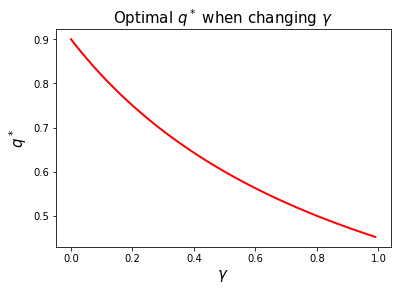

In [6]:
plt.clf()
plt.plot(range_gamma, q_stars,'-', color = 'r', linewidth = 2)
plt.title("Optimal $q^*$ when changing $\gamma$",fontsize = 15)
plt.xlabel("$\gamma$",fontsize = 15)
plt.ylabel("$q^*$",fontsize = 15)
plt.show()


$\gamma$ is measure of product subtitutability: the closer it gets to 1, the more substitutable are the products and the lower the utility for a given pair $(q_1,q_2)$. So, when $\gamma$ increases, the planner optimally reduces the quantities produced.

### (c) Suppose 1 and 2 compete a la Cournot. Numerically solve for the Cournot equilibrium quantities: $q_1^c$, $q_2^c$. Is $q_1^c \gtreqqless q_1^*$? Why?

In [7]:
def demand(q1,q2,gamma):
    return 1-q1-gamma*q2

def cost(q,c):
    if q == 0:
     cost = 0
    else:
     cost = c*q
    return cost

def profit(q1,q2,c,gamma):
    return demand(q1,q2,gamma)*q1-cost(q1,c)

def reaction(q2,c,gamma):
    q1 = optimize.brute(lambda q: -profit(q,q2,c,gamma), ((0,1,),))                                                         
    return q1[0]

def vector_reaction(q,param): # vector param = (c,gamma)
    return array(q)-array([reaction(q[1],param[0],param[1]),reaction(q[0],param[0],param[1])])

In [8]:
param = [0.1,0.5]
q0 = [0.1, 0.1]

ans = optimize.fsolve(vector_reaction, q0, args = (param))
print (ans)

[0.36000206 0.36000206]


The Cournot quantities (0.36) are smaller than the first-best quantities (0.6) because firms have market power and do not internalize the gains to infra-marginal consumers when output goes up and prices down.

### (d)  For $\gamma=0.5$, numerically find the quantities $q_1^m, q_2^m$ maximizing joint profits. Are they equal to, greater than, or smaller than the Cournot quantities? Why?

In [9]:
def joint_profits(q1,q2,c,gamma):
    profit1 = profit(q1,q2,c,gamma)
    profit2 = profit(q2,q1,c,gamma)
    return (profit1+profit2)


In [10]:
def joint_profit_reaction(q2,c,gamma):
    q1 = optimize.brute(lambda q: -joint_profits(q,q2,c,gamma), ((0,1,),)) 
    return q1[0]


def vector_joint_profit_reaction(q,param): # vector param = (c,gamma)
    return array(q)-array([joint_profit_reaction(q[1],param[0],param[1]),
                           joint_profit_reaction(q[0],param[0],param[1])])

In [11]:
param = [0.1,0.5]
q0 = [0.1, 0.1]

ansjpm = optimize.fsolve(vector_joint_profit_reaction, q0, args = (param))
print (ansjpm)

[0.3 0.3]


A two-product monopolist would realize that an increase of $q_1$ that happens to be profitable for firm $1$ also reduces the price for firm $2$ (and conversely).

### (e) Suppose that the game is infinitely repeated with discount rate $\delta \in (0,1)$ (firms strive to maximize total discounted profits). For $\delta=2/3$,  is the outcome in (d) implementable as part of a subgame-perfect equilibrium? <br>In addition, plot static collusive profits, $\pi_1^m$, as a function of $\gamma \in [0,1)$. Do not forget to account for the IC constraint. Collusive profits are defined as the joint-profit maximizing profits when the IC constraint is satisfied, and as Cournot profits otherwise. <br>Is collusion easier when $\gamma$ is close to 0 or $\gamma$ close to 1?

In [12]:
gamma=0.5
c=0.1
print (profit(ansjpm[0],ansjpm[1],c,gamma))
print((1-0.66)*profit(reaction(ansjpm[1],c,gamma),ansjpm[0],c,gamma)+0.66*profit(ans[0],ans[1],c,gamma))
print (profit(ansjpm[0],ansjpm[1],c,gamma) >= 
              ((1-0.66)*profit(reaction(ansjpm[1],c,gamma),ansjpm[0],c,gamma)+0.66*profit(ans[0],ans[1],c,gamma)))

0.13499999999999998
0.1333482554290433
True


So, indeed, the joint profit-maximizing quantities can be sustained in subgame-perfect equilibrium.

In [13]:
def collusion_profits(q,c,gamma,delta): 
    profits = profit(q,q,c,gamma)
    ans = optimize.fsolve(vector_reaction, q0, args = ([c,gamma]))
    if profits >= (1-delta)*profit(reaction(q,c,gamma),q,c,gamma)+delta*profit(ans[0],ans[1],c,gamma):
        industry_profits = joint_profits(q,q,c,gamma) 
    else:
        industry_profits = 2*profit(ans[0],ans[1],c,gamma) 
    return industry_profits

In [14]:
range_gamma = arange(0,1,0.05)
range_q = arange(0,1,0.05)

profits_m = []
for i in range_gamma:
    pi = [collusion_profits(j,0.1,i,0.66) for j in range_q]
    profits_m.append(max(pi))
    

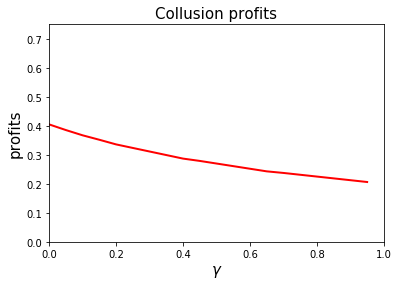

In [15]:
plt.clf()
 
plt.plot(range_gamma, profits_m,'-', color = 'r', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("$\gamma$",fontsize = 15)
plt.ylabel("profits",fontsize = 15)
plt.xlim(0,1)
plt.ylim(0.0,.75)
plt.show()

### (f) On the basis of the graph in  (e) , do you think that competition authorities should worry less about collusion in markets where products are more substitutable? 

NO! The fact that collusive profits go down simply correspond to the fact that utility goes down when products become
more substitutable and therefore the  market shrinks, not that collusion is less sustainable.